# GitHub address
## https://github.com/BoranKY/Fuzzy_Logic_Coffe_Recommendation/tree/main

In [13]:
# Coffee Strength Fuzzy Controller 
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
# Inputs
sleep_hours   = ctrl.Antecedent(np.arange(0, 12.01, 0.1), 'sleep_hours')     # 0–12
work_intensity= ctrl.Antecedent(np.arange(0, 10.01, 0.1), 'work_intensity')  # 0–10
stress_level  = ctrl.Antecedent(np.arange(0, 10.01, 0.1), 'stress_level')    # 0–10
coffee_strength = ctrl.Consequent(np.arange(0, 100.01, 0.5), 'coffee_strength')

In [3]:
# Membership Funsctions  and Rules
# Sleep: Low / Normal / High
sleep_hours['low']   = fuzz.trimf(sleep_hours.universe, [0,  4,  6])
sleep_hours['norm']  = fuzz.trimf(sleep_hours.universe, [5,  7,  9])
sleep_hours['high']  = fuzz.trimf(sleep_hours.universe, [8, 10, 12])

# Work: Low / Med / High
work_intensity['low'] = fuzz.trimf(work_intensity.universe, [0, 2, 4])
work_intensity['med'] = fuzz.trimf(work_intensity.universe, [3, 5, 7])
work_intensity['high']= fuzz.trimf(work_intensity.universe, [6, 8,10])

# Stress: Low / High (bilerek basit tuttuk)
stress_level['low']  = fuzz.trimf(stress_level.universe, [0, 2, 4])
stress_level['high'] = fuzz.trimf(stress_level.universe, [6, 8,10])

# Output: Mild / Medium / Strong
coffee_strength['mild']   = fuzz.trimf(coffee_strength.universe, [ 0, 20, 40])
coffee_strength['medium'] = fuzz.trimf(coffee_strength.universe, [30, 50, 70])
coffee_strength['strong'] = fuzz.trimf(coffee_strength.universe, [60, 80,100])

# Rules
rule1 = ctrl.Rule(sleep_hours['low'], coffee_strength['strong'])
rule2 = ctrl.Rule(work_intensity['high'] | stress_level['high'], coffee_strength['strong'])
rule3 = ctrl.Rule(sleep_hours['high'] & work_intensity['low'] & stress_level['low'], coffee_strength['mild'])
rule4 = ctrl.Rule(sleep_hours['norm'] & work_intensity['med'] & stress_level['low'], coffee_strength['medium'])
rule5 = ctrl.Rule(sleep_hours['low'] & work_intensity['med'], coffee_strength['medium'])

In [7]:
# System
coffee_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
coffee_sim  = ctrl.ControlSystemSimulation(coffee_ctrl)

def suggest_coffee(sleep_h, work_i, stress_i):
    coffee_sim.input['sleep_hours'] = float(sleep_h)
    coffee_sim.input['work_intensity'] = float(work_i)
    coffee_sim.input['stress_level'] = float(stress_i)
    coffee_sim.compute()
    val = float(coffee_sim.output['coffee_strength'])
    label = 'mild' if val < 35 else ('medium' if val < 60 else 'strong')
    return val, label

In [9]:
# Simulation
tests = [
    ("3h sleep, 9/10 iş, 8/10 stres", 3.0, 9.0, 8.0),
    ("8.5h sleep, 2/10 iş, 2/10 stres", 8.5, 2.0, 2.0),
    ("6h sleep, 5/10 iş, 3/10 stres", 6.0, 5.0, 3.0),
]
for name, s, w, t in tests:
    v, lab = suggest_coffee(s, w, t)
    print(f"{name:<34s} → {lab.upper():>6} ({v:.1f})")


3h sleep, 9/10 iş, 8/10 stres      → STRONG (80.0)
8.5h sleep, 2/10 iş, 2/10 stres    →   MILD (20.0)
6h sleep, 5/10 iş, 3/10 stres      → MEDIUM (50.0)


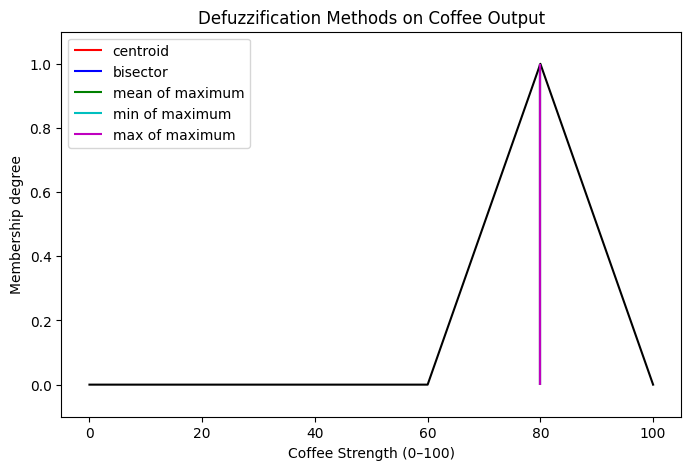

Centroid: 79.99999999999996
Bisector: 80.0
Mean of Max: 80.0
Min of Max: 80.0
Max of Max: 80.0


In [15]:
# DEFUZZ

# Coffee output universe 
x = coffee_strength.universe

mfx = fuzz.trimf(x, [60, 80, 100])  # strong coffe example for membership functions

# Defuzzify
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Prepare lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum', 'max of maximum']
xvals = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]
colors = ['r','b','g','c','m']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, mfx, 'k')

for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)

plt.ylabel('Membership degree')
plt.xlabel('Coffee Strength (0–100)')
plt.title('Defuzzification Methods on Coffee Output')
plt.ylim(-0.1, 1.1)
plt.legend(loc='upper left')
plt.show()

print("Centroid:", defuzz_centroid)
print("Bisector:", defuzz_bisector)
print("Mean of Max:", defuzz_mom)
print("Min of Max:", defuzz_som)
print("Max of Max:", defuzz_lom)


In [19]:
# For visulation I need to declared them again 

# Sleep
x_sleep       = sleep_hours.universe
mf_sleep_low  = sleep_hours['low'].mf
mf_sleep_norm = sleep_hours['norm'].mf
mf_sleep_high = sleep_hours['high'].mf

# Work
x_work        = work_intensity.universe
mf_work_low   = work_intensity['low'].mf
mf_work_med   = work_intensity['med'].mf
mf_work_high  = work_intensity['high'].mf

# Stress
x_stress      = stress_level.universe
mf_strs_low   = stress_level['low'].mf
mf_strs_high  = stress_level['high'].mf

# Coffee Output
x_cof         = coffee_strength.universe
mf_out_mild   = coffee_strength['mild'].mf
mf_out_medium = coffee_strength['medium'].mf
mf_out_strong = coffee_strength['strong'].mf


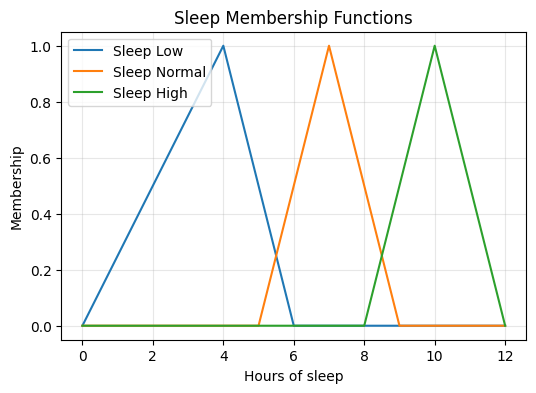

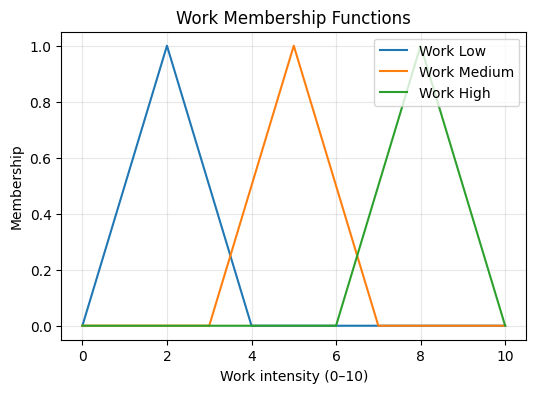

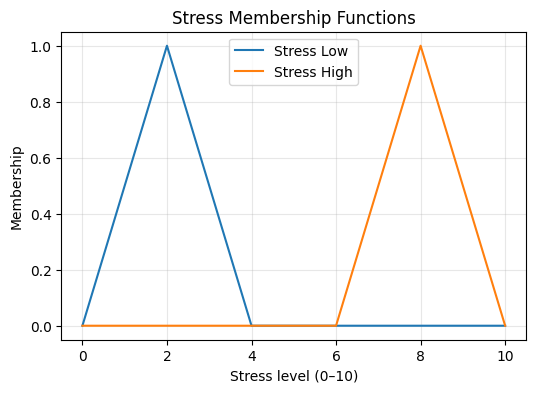

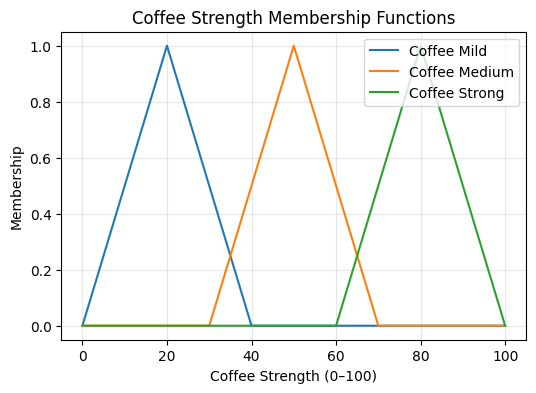

In [21]:
# Visulation of each membership function

import matplotlib.pyplot as plt

# Sleep
plt.figure(figsize=(6,4))
plt.plot(x_sleep, mf_sleep_low,   label='Sleep Low')
plt.plot(x_sleep, mf_sleep_norm,  label='Sleep Normal')
plt.plot(x_sleep, mf_sleep_high,  label='Sleep High')
plt.title("Sleep Membership Functions")
plt.xlabel("Hours of sleep")
plt.ylabel("Membership")
plt.legend()
plt.grid(alpha=.3)
plt.show()

# Work
plt.figure(figsize=(6,4))
plt.plot(x_work, mf_work_low,   label='Work Low')
plt.plot(x_work, mf_work_med,   label='Work Medium')
plt.plot(x_work, mf_work_high,  label='Work High')
plt.title("Work Membership Functions")
plt.xlabel("Work intensity (0–10)")
plt.ylabel("Membership")
plt.legend()
plt.grid(alpha=.3)
plt.show()

# Stress
plt.figure(figsize=(6,4))
plt.plot(x_stress, mf_strs_low,   label='Stress Low')
plt.plot(x_stress, mf_strs_high,  label='Stress High')
plt.title("Stress Membership Functions")
plt.xlabel("Stress level (0–10)")
plt.ylabel("Membership")
plt.legend()
plt.grid(alpha=.3)
plt.show()

# Coffee Output
plt.figure(figsize=(6,4))
plt.plot(x_cof, mf_out_mild,   label='Coffee Mild')
plt.plot(x_cof, mf_out_medium, label='Coffee Medium')
plt.plot(x_cof, mf_out_strong, label='Coffee Strong')
plt.title("Coffee Strength Membership Functions")
plt.xlabel("Coffee Strength (0–100)")
plt.ylabel("Membership")
plt.legend()
plt.grid(alpha=.3)
plt.show()
